# Mini-Batches

So with toy data sets of 100 examples and 4-5 features, it is easy to do gradient descent all at once. However for data sets that have millions of training examples and hundreds of thousands of pictures, it is not feasible to operate on all of the data simultaneous.

Consider the following (very real) problem: suppose we want to train on image data and each image is approximately 1 mb in size. If we had 50,000 images, it would take 50 gigabytes to store all of those images in memory. Even a beefy gaming desktop has 32 gigabytes of ram on average, so it's not feasible to have all the images loaded up and ready to go all at once.

A much more reasonable approach: load a **mini-batch** of images into memory, say 128 images which only require a more reasonable 128 megabytes to store. We then do backpropagation on this batch of images, save the gradient values, and remove the images from memory. Then we open up another batch and repeat the process.
- So the idea is split up the 50,000 images into mini-batches of 128 images, and only have one batch open at any given time.
- This way, we'll only ever need 128 megabytes of memory while we are training. So instead of trying to train everything at once, we are spreading out the load at the cost of increased training time.

So how do we do this? Well, in PyTorch, we have the ```Dataset``` and ```DataLoader``` classes

In [2]:
import torch
import torchvision # This is PyTorch's package of pre-trained models and image processing functions
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [3]:
# write a custom Dataset object for the wine quality dataset
class WineDataset(Dataset):
    
    def __init__(self):
        # data loading goes here
        data = np.loadtxt('./data/winequality.csv', delimiter=",", dtype=np.float32, skiprows=1)
        # define input data
        self.x = torch.as_tensor(data[:, 1:], device='cuda')
        # define target variable
        self.y = torch.as_tensor(data[:, [0]], device='cuda')
        self.n_samples = data.shape[0]
        
    def __getitem__(self, index):
        # calls element from dataset by index
        return self.x[index], self.y[index]
    
    def __len__(self):
        # allows us to get the length of the dataset
        return self.n_samples

In [4]:
# create our wine dataset
dataset = WineDataset()

# check out some of the data
dataset[0:2]

(tensor([[ 0.7000,  0.0000,  1.9000,  0.0760, 11.0000, 34.0000,  0.9978,  3.5100,
           0.5600,  9.4000,  5.0000,  1.0000],
         [ 0.8800,  0.0000,  2.6000,  0.0980, 25.0000, 67.0000,  0.9968,  3.2000,
           0.6800,  9.8000,  5.0000,  1.0000]], device='cuda:0'),
 tensor([[7.4000],
         [7.8000]], device='cuda:0'))

<br>

So this allows us to "store" datasets in a relatively clean way.

What we want to do next is find a way to chop up the dataset into mini-batches, which we can do like so:

In [5]:
dataloader = DataLoader(
                dataset = dataset, # dataset object to load
                batch_size=64, # batch size of each mini batch
                shuffle=False, # whether shuffle and draw new mini-batches after each epoch
            )


# convert dataloader to an iterator
dataiter = iter(dataloader)

# call the "next()" method, returns a tuple
data = dataiter.next()

features, labels = data
# print out a batch of training data
features, labels

(tensor([[7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01, 3.4000e+01,
          9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00, 5.0000e+00, 1.0000e+00],
         [8.8000e-01, 0.0000e+00, 2.6000e+00, 9.8000e-02, 2.5000e+01, 6.7000e+01,
          9.9680e-01, 3.2000e+00, 6.8000e-01, 9.8000e+00, 5.0000e+00, 1.0000e+00],
         [7.6000e-01, 4.0000e-02, 2.3000e+00, 9.2000e-02, 1.5000e+01, 5.4000e+01,
          9.9700e-01, 3.2600e+00, 6.5000e-01, 9.8000e+00, 5.0000e+00, 1.0000e+00],
         [2.8000e-01, 5.6000e-01, 1.9000e+00, 7.5000e-02, 1.7000e+01, 6.0000e+01,
          9.9800e-01, 3.1600e+00, 5.8000e-01, 9.8000e+00, 6.0000e+00, 1.0000e+00],
         [7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01, 3.4000e+01,
          9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00, 5.0000e+00, 1.0000e+00],
         [6.6000e-01, 0.0000e+00, 1.8000e+00, 7.5000e-02, 1.3000e+01, 4.0000e+01,
          9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00, 5.0000e+00, 1.0000e+00],
         [

In [6]:
# dummy training loop
num_epochs = 2 
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/64)

print(total_samples, n_iterations)

6497 102


In [7]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward pass, backprop, descend
        if (i+1)%5==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/102, inputs torch.Size([64, 12])
epoch 1/2, step 10/102, inputs torch.Size([64, 12])
epoch 1/2, step 15/102, inputs torch.Size([64, 12])
epoch 1/2, step 20/102, inputs torch.Size([64, 12])
epoch 1/2, step 25/102, inputs torch.Size([64, 12])
epoch 1/2, step 30/102, inputs torch.Size([64, 12])
epoch 1/2, step 35/102, inputs torch.Size([64, 12])
epoch 1/2, step 40/102, inputs torch.Size([64, 12])
epoch 1/2, step 45/102, inputs torch.Size([64, 12])
epoch 1/2, step 50/102, inputs torch.Size([64, 12])
epoch 1/2, step 55/102, inputs torch.Size([64, 12])
epoch 1/2, step 60/102, inputs torch.Size([64, 12])
epoch 1/2, step 65/102, inputs torch.Size([64, 12])
epoch 1/2, step 70/102, inputs torch.Size([64, 12])
epoch 1/2, step 75/102, inputs torch.Size([64, 12])
epoch 1/2, step 80/102, inputs torch.Size([64, 12])
epoch 1/2, step 85/102, inputs torch.Size([64, 12])
epoch 1/2, step 90/102, inputs torch.Size([64, 12])
epoch 1/2, step 95/102, inputs torch.Size([64, 12])
epoch 1/2, st

---

## Dataset and I/O

We mentioned in the beginning that when training on image data, it's usually not feasible to load all images into memory at once. We can control how many images get loaded into memory by doing a "lazy" load, i.e. reading in files one at a time.

In [8]:
import os
from torchvision.io import read_image

import matplotlib.pyplot as plt

In [9]:
class IntelScenicDataset(Dataset):
    
    def __init__(self):
        # specify image directory
        self.img_dir = './data/intel-scenic'
        
    # specify number of images in folder
    def __len__(self):
        return len(os.listdir(self.img_dir))
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir,os.listdir(self.img_dir)[idx])
        image = read_image(img_path)
        return image

In [10]:
# instantiate Intel Scenic images dataset
inteldataset = IntelScenicDataset()

In [11]:
dataloader = DataLoader(inteldataset, batch_size=1)

 
tensor([[[[131, 131, 131,  ..., 162, 163, 164],
          [131, 131, 131,  ..., 166, 167, 166],
          [130, 130, 131,  ..., 170, 171, 171],
          ...,
          [173, 168, 165,  ..., 125, 119, 122],
          [190, 201, 216,  ..., 134, 130, 136],
          [253, 249, 245,  ..., 133, 125, 129]],

         [[194, 194, 194,  ..., 217, 218, 219],
          [194, 194, 194,  ..., 218, 219, 217],
          [193, 193, 193,  ..., 218, 219, 218],
          ...,
          [170, 168, 165,  ..., 148, 144, 147],
          [187, 198, 213,  ..., 156, 155, 160],
          [251, 247, 243,  ..., 154, 149, 153]],

         [[247, 245, 245,  ..., 237, 238, 239],
          [247, 245, 245,  ..., 239, 240, 236],
          [244, 244, 244,  ..., 240, 239, 238],
          ...,
          [163, 160, 157,  ...,  44,  42,  46],
          [178, 189, 204,  ...,  56,  54,  62],
          [239, 235, 231,  ...,  61,  53,  57]]]], dtype=torch.uint8)
 
 
tensor([[[[251, 251, 251,  ..., 255, 255, 255],
          [

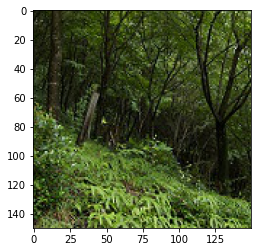

In [12]:
# we can now use the dataloader to loop through the image files
# each file gets called, one at a time, from the __getitem__() method in the dataset
# therefore the images are read from disk into ram one at a time
for img in dataloader:
    print(" ")
    print(img)
    plt.imshow(img[0].permute(1,2,0))
    print(" ")